In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [71]:
# Load dataset
df = pd.read_csv('Cleaned-Data.csv')

In [72]:
# Preview the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
0      1          1          1                        1            1   
1      1          1          1                        1            1   
2      1          1          1                        1            1   
3      1          1          1                        1            1   
4      1          1          1                        1            1   

   None_Sympton  Pains  Nasal-Congestion  Runny-Nose  Diarrhea  ...  \
0             0      1                 1           1         1  ...   
1             0      1                 1           1         1  ...   
2             0      1                 1           1         1  ...   
3             0      1                 1           1         1  ...   
4             0      1                 1           1         1  ...   

   Gender_Male  Gender_Transgender  Severity_Mild  Severity_Moderate  \
0            1                   0              1  

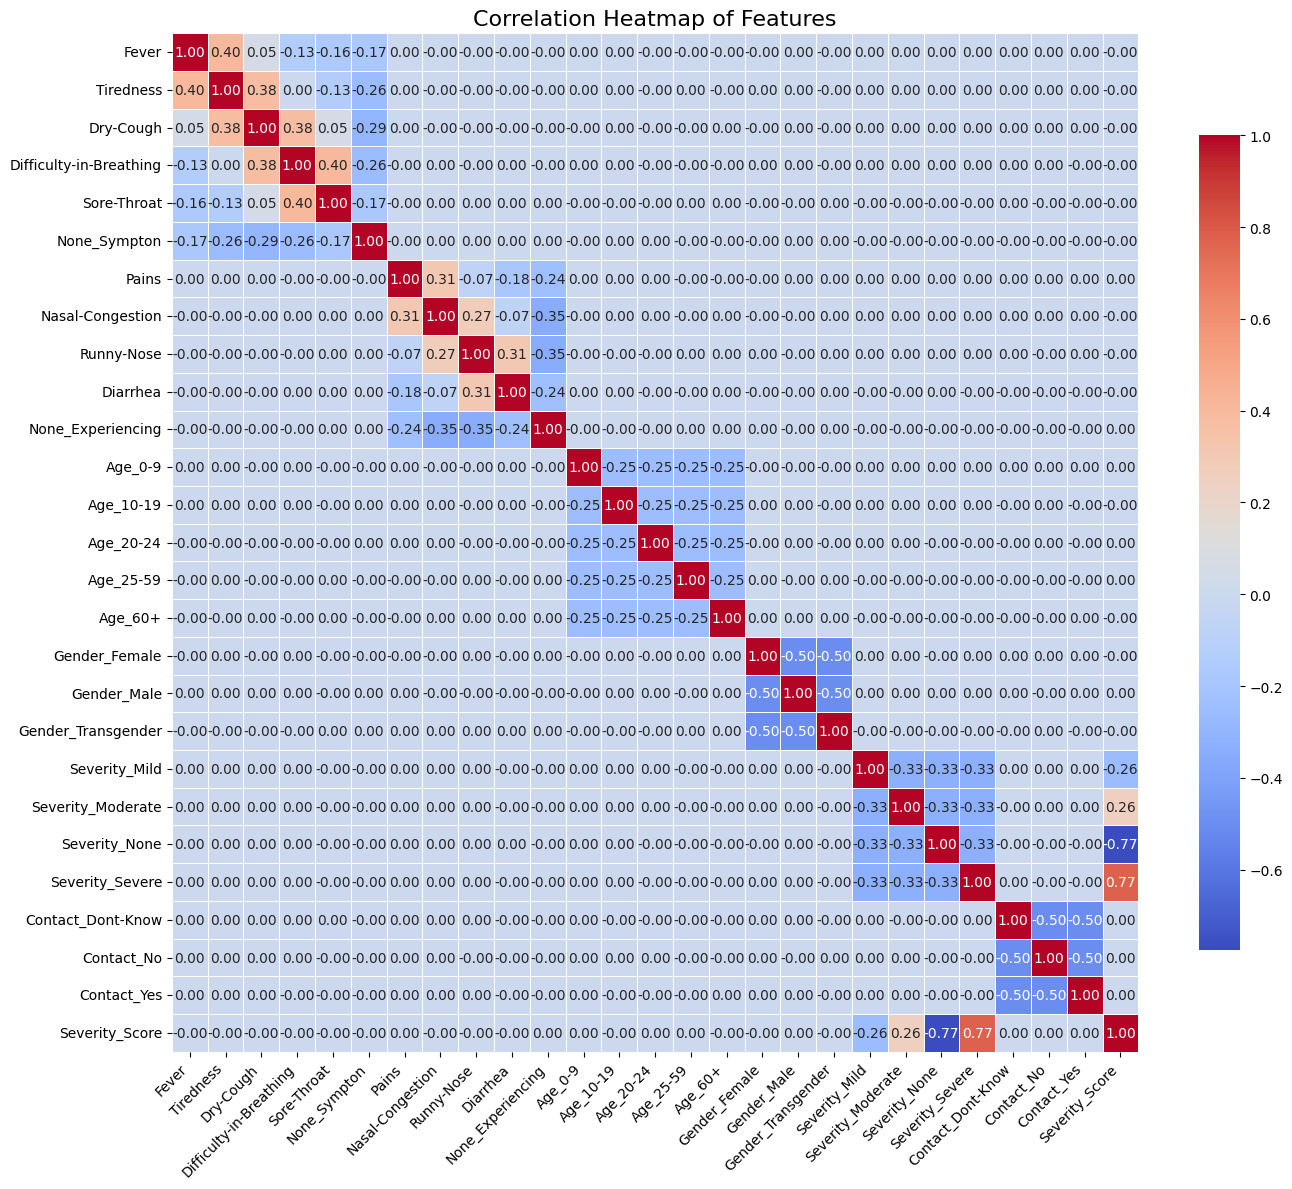

In [93]:
# Correlation Heatmap (Enhanced Readability)
plt.figure(figsize=(14, 12))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


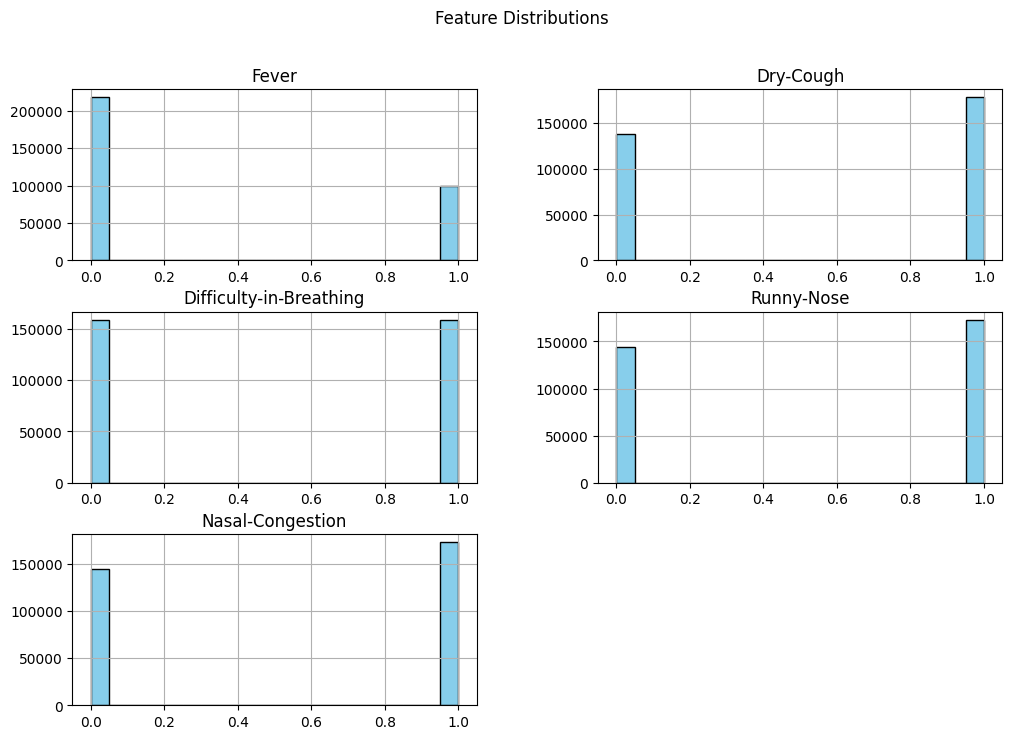

In [74]:
# Feature Distribution Histograms
key_features = ['Fever', 'Dry-Cough', 'Difficulty-in-Breathing', 'Runny-Nose', 'Nasal-Congestion']
df[key_features].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

In [75]:
# Create a severity score for regression
df['Severity_Score'] = df['Severity_Mild'] * 1 + df['Severity_Moderate'] * 2 + df['Severity_Severe'] * 3

In [76]:
# Define features and target
features = df.drop(['Severity_Mild', 'Severity_Moderate', 'Severity_Severe', 'Severity_None', 'Country', 'Severity_Score'], axis=1)
target = df['Severity_Score']

In [77]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [78]:
# Linear Regression with SGD
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.01, random_state=42)
train_losses, test_losses = [], []

for epoch in range(1, 201):  # 200 iterations (epochs)
    sgd_reg.partial_fit(X_train, y_train)
    train_pred = sgd_reg.predict(X_train)
    test_pred = sgd_reg.predict(X_test)
    train_losses.append(mean_squared_error(y_train, train_pred))
    test_losses.append(mean_squared_error(y_test, test_pred))

In [79]:
# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
dt_loss = mean_squared_error(y_test, dt_reg.predict(X_test))

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_loss = mean_squared_error(y_test, rf_reg.predict(X_test))

# Linear Regression final loss
final_sgd_loss = mean_squared_error(y_test, sgd_reg.predict(X_test))

print(f"SGD Linear Regression Test Loss (MSE): {final_sgd_loss:.4f}")
print(f"Decision Tree Test Loss (MSE): {dt_loss:.4f}")
print(f"Random Forest Test Loss (MSE): {rf_loss:.4f}")

SGD Linear Regression Test Loss (MSE): 1.4127
Decision Tree Test Loss (MSE): 1.3165
Random Forest Test Loss (MSE): 1.3172


In [80]:
# Select the best model
losses = {'SGD': final_sgd_loss, 'DecisionTree': dt_loss, 'RandomForest': rf_loss}
best_model_name = min(losses, key=losses.get)
best_model = {'SGD': sgd_reg, 'DecisionTree': dt_reg, 'RandomForest': rf_reg}[best_model_name]

print(f"\nBest model: {best_model_name} with loss: {losses[best_model_name]:.4f}")


Best model: DecisionTree with loss: 1.3165


In [81]:
# Save the best model
joblib.dump(best_model, 'best_severity_model.pkl')

['best_severity_model.pkl']

In [82]:
# Predict on one test data point
sample_input = X_test.iloc[[0]]
sample_prediction = best_model.predict(sample_input)
print("\nSample Prediction on one data point:", sample_prediction[0])


Sample Prediction on one data point: 1.5294117647058822


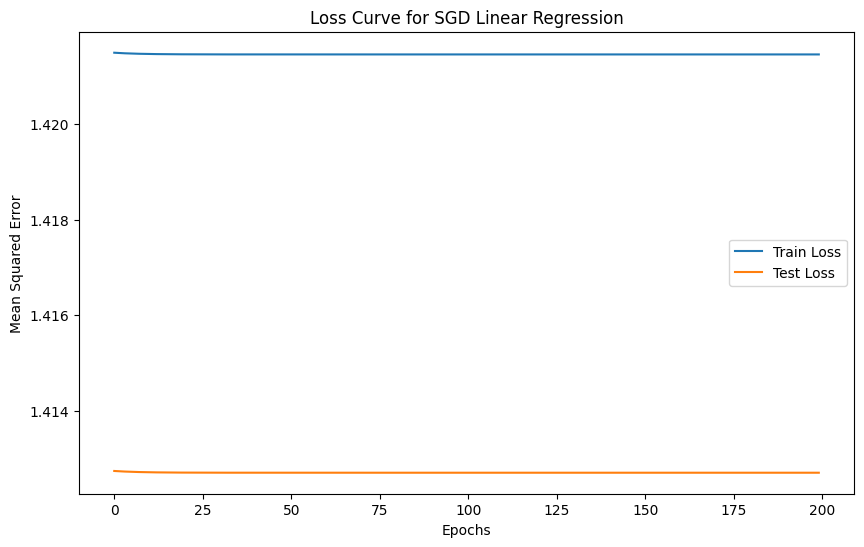

In [91]:
# Plot Loss Curve
plt.figure(figsize=(10,6))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curve for SGD Linear Regression')
plt.legend()
plt.show()

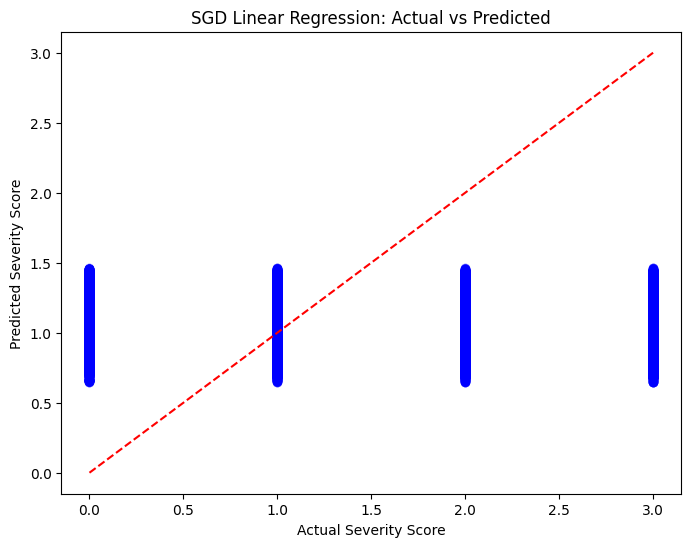

In [92]:
# Scatter plot of the final linear fit for visualization
linear_pred = sgd_reg.predict(X_test)
plt.figure(figsize=(8,6))
plt.scatter(y_test, linear_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Severity Score')
plt.ylabel('Predicted Severity Score')
plt.title('SGD Linear Regression: Actual vs Predicted')
plt.show()